<a href="https://colab.research.google.com/github/oladimeji-kazeem/ITNPAI1/blob/master/Deep_Learning_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning using wavelet transformation

In [ ]:
import numpy as np
import cv2
import pywt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
# Adjust figure sizes
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

**Task 1:** Apply wavelet transform and visualise vairous subbands
(Slide 9/19)

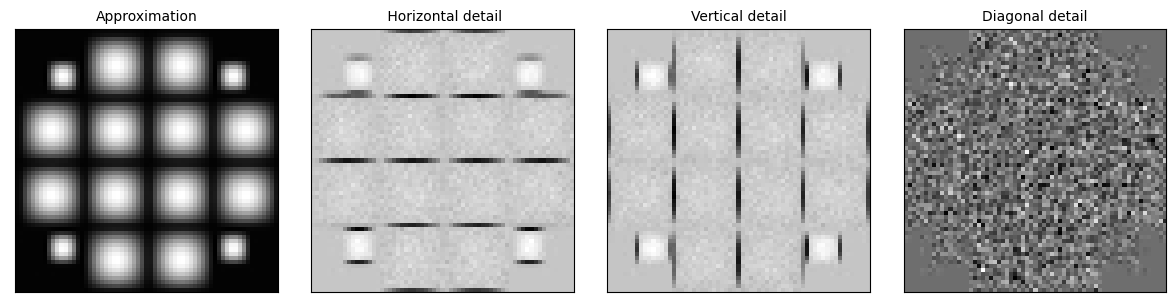

In [ ]:
img = cv2.imread('p6-images/task1.tif', cv2.IMREAD_GRAYSCALE)
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(img, 'db2')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, cmap=plt.cm.gray)
  ax.set_title(titles[i], fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])
fig.tight_layout()
plt.show()

**Task 2:** Apply wavelet transform to create multiresolution sub-
bands (slide 19)

At different levels you can capture approaximate and finer details of the image.


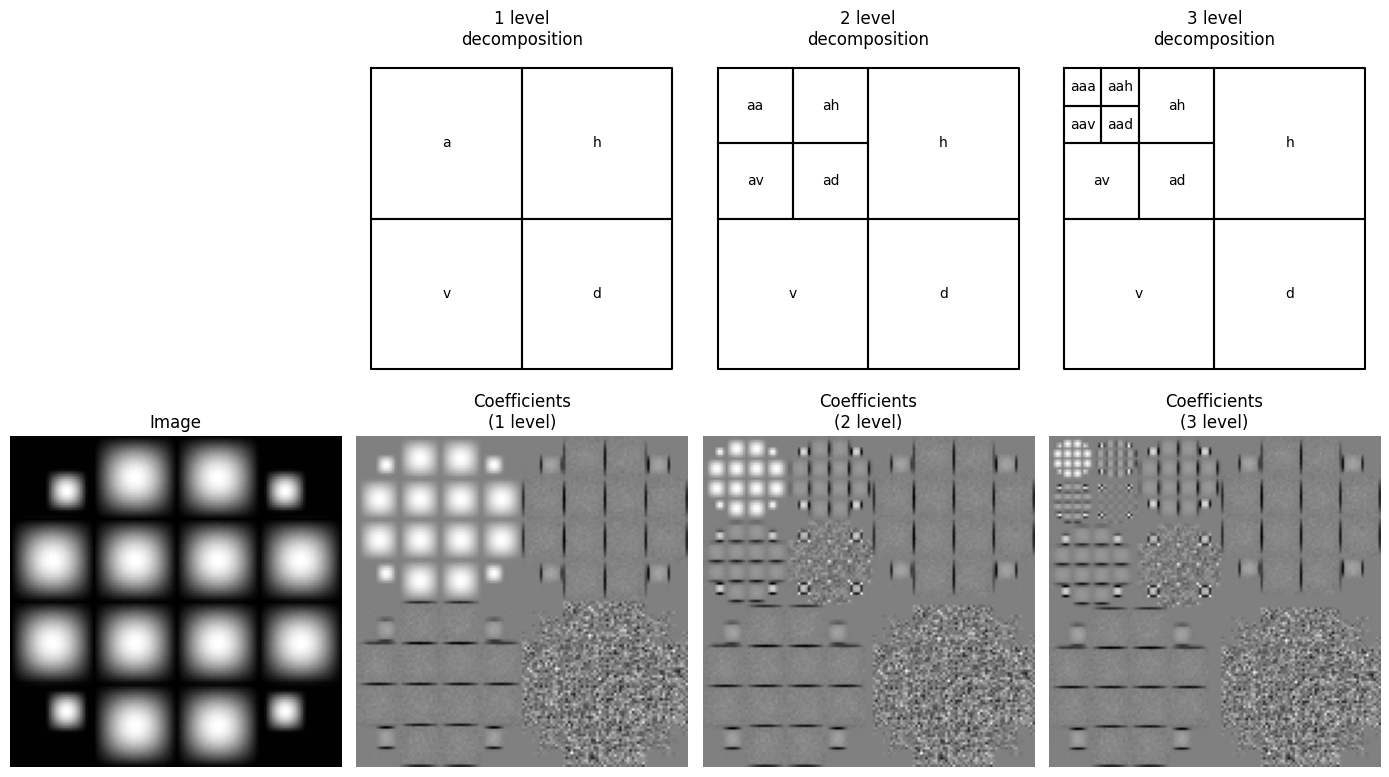

In [ ]:
img = cv2.imread('p6-images/task1.tif', cv2.IMREAD_GRAYSCALE)
wavelet_name = 'db2'
shape = img.shape
max_lev = 3 # how many levels of decomposition to draw
label_levels = 3 # how many levels to explicitly label on the plots
fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
  if level == 0:
  # show the original image before decomposition
    axes[0, 0].set_axis_off()
    axes[1, 0].imshow(img, cmap=plt.cm.gray)
    axes[1, 0].set_title('Image')
    axes[1, 0].set_axis_off()
    continue
  # plot subband boundaries of a standard DWT basis
  draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
  label_levels=label_levels)
  axes[0, level].set_title('{} level\ndecomposition'.format(level))
  # compute the 2D DWT
  c = pywt.wavedec2(img, wavelet_name, level=level)

  # normalize each coefficient array independently for better visibility
  c[0] /= np.abs(c[0]).max()
  for detail_level in range(level):
    c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
  # show the normalized coefficients
  arr, slices = pywt.coeffs_to_array(c)
  axes[1, level].imshow(arr, cmap=plt.cm.gray)
  axes[1, level].set_title('Coefficients\n({} level)'.format(level))
  axes[1, level].set_axis_off()
plt.tight_layout()
plt.show()

**Task 3:** Edge detection using DWT (Slide 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


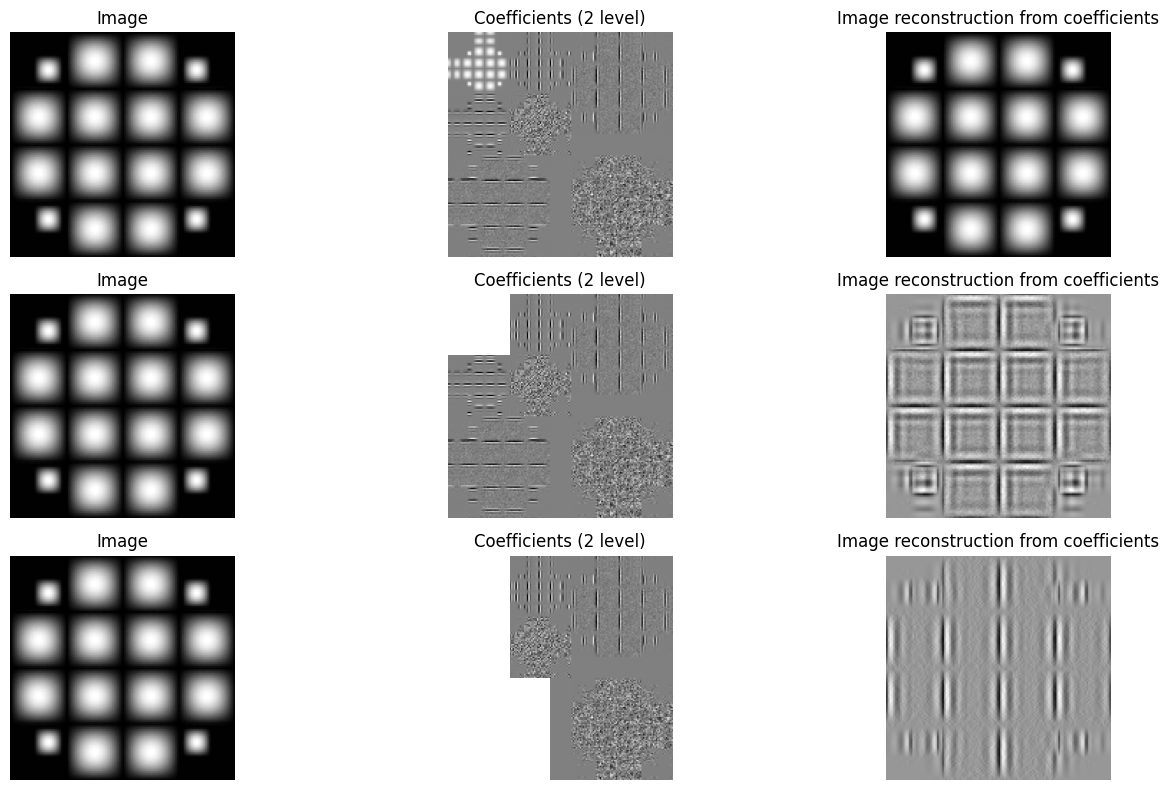

In [ ]:
img = cv2.imread('p6-images/task1.tif', cv2.IMREAD_GRAYSCALE)
wavelet_name = 'db8'
max_level = 2 # how many levels of decomposition to draw
fig, axes = plt.subplots(3, 3, figsize=[14, 8])
# compute the 2D DWT
coeff = pywt.wavedec2(img, wavelet_name, level = max_level)
coeff_recon1 = coeff[:] # Create a copy of the raw coefficients

coeff_recon2 = coeff[:] # Create a copy of the raw coefficients
coeff_recon3 = coeff[:] # Create a copy of the raw coefficients
# Reconstruct without any modification
img_recon1 = pywt.waverec2(coeff_recon1,wavelet_name)
img_recon1 = cv2.normalize(img_recon1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# Reconstruction with modification (part 1)
coeff_recon2[0] = np.zeros_like(coeff_recon2[0], dtype=np.float64)
img_recon2 = pywt.waverec2(coeff_recon2,wavelet_name)
img_recon2 = cv2.normalize(img_recon2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# Reconstruction with modification (part 2)
coeff_recon3[0] = np.zeros_like(coeff_recon3[0], dtype=np.float64)
LH2, HL2, HH2 = coeff_recon3[1]
LH2 = np.zeros_like(LH2, dtype=np.float64)
coeff_recon3[1] = LH2, HL2, HH2
LH1, HL1, HH1 = coeff_recon3[2]
LH1 = np.zeros_like(LH1, dtype=np.float64)
coeff_recon3[2] = LH1, HL1, HH1
img_recon3 = pywt.waverec2(coeff_recon3,wavelet_name)
img_recon3 = cv2.normalize(img_recon3, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# Visualise everything
# show the original image before decomposition
axes[0, 0].imshow(img, cmap=plt.cm.gray)
axes[0, 0].set_title('Image')
axes[0, 0].set_axis_off()
# normalize each coefficient array independently for better visibility
coeff[0] /= np.abs(coeff[0]).max()
for detail_level in range(max_level):
  coeff[detail_level + 1] = [d/np.abs(d).max() for d in coeff[detail_level + 1]]
# show the normalized coefficients
arrray, slices = pywt.coeffs_to_array(coeff)
axes[0, 1].imshow(arrray, cmap=plt.cm.gray)
axes[0, 1].set_title('Coefficients ({} level)'.format(max_level))
axes[0, 1].set_axis_off()
axes[0, 2].imshow(img_recon1, cmap=plt.cm.gray)
axes[0, 2].set_title('Image reconstruction from coefficients')

axes[0, 2].set_axis_off()
# show the original image before decomposition
axes[1, 0].imshow(img, cmap=plt.cm.gray)
axes[1, 0].set_title('Image')
axes[1, 0].set_axis_off()
# normalize each coefficient array independently for better visibility
coeff_recon2[0] /= np.abs(coeff_recon2[0]).max()
for detail_level in range(max_level):
  coeff_recon2[detail_level + 1] = [d/np.abs(d).max() for d in coeff_recon2[detail_level + 1]]
# show the normalized coefficients
arrray, slices = pywt.coeffs_to_array(coeff_recon2)
axes[1, 1].imshow(arrray, cmap=plt.cm.gray)
axes[1, 1].set_title('Coefficients ({} level)'.format(max_level))
axes[1, 1].set_axis_off()
axes[1, 2].imshow(img_recon2, cmap=plt.cm.gray)
axes[1, 2].set_title('Image reconstruction from coefficients')
axes[1, 2].set_axis_off()
# show the original image before decomposition
axes[2, 0].imshow(img, cmap=plt.cm.gray)
axes[2, 0].set_title('Image')
axes[2, 0].set_axis_off()
# normalize each coefficient array independently for better visibility
coeff_recon3[0] /= np.abs(coeff_recon3[0]).max()
for detail_level in range(max_level):
  coeff_recon3[detail_level + 1] = [d/np.abs(d).max() for d in coeff_recon3[detail_level + 1]]
# show the normalized coefficients
arrray, slices = pywt.coeffs_to_array(coeff_recon3)
axes[2, 1].imshow(arrray, cmap=plt.cm.gray)
axes[2, 1].set_title('Coefficients ({} level)'.format(max_level))
axes[2, 1].patch.set_edgecolor('black')
axes[2, 1].patch.set_linewidth('1')
axes[2, 1].set_axis_off()
axes[2, 2].imshow(img_recon3, cmap=plt.cm.gray)
axes[2, 2].set_title('Image reconstruction from coefficients')
axes[2, 2].set_axis_off()
plt.tight_layout()
plt.show()
